In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# игнорировать предупреждения
import warnings
warnings.filterwarnings("ignore")

In [12]:
colors = [
    'magenta',
    'goldenrod',
    'brown',
    'blue',
    'salmon',
    'darkred',
    'gold',
    'darkgreen',
    'olive',
    'cyan',
    'darkblue',
    'indigo'
]

In [3]:
data = pd.read_csv('geo_comment_2.csv', delimiter=';', converters={
    'x': lambda x: float(x.replace(',', '.')),
    'y': lambda y: float(y.replace(',', '.'))
})
data = data.drop(data.columns[5], axis=1)
data = data.drop(data.columns[0], axis=1)

In [4]:
scaler = StandardScaler()
data_scaled = data.copy()
for c in data.columns:
  data_scaled[c] = scaler.fit_transform(data[[c]])

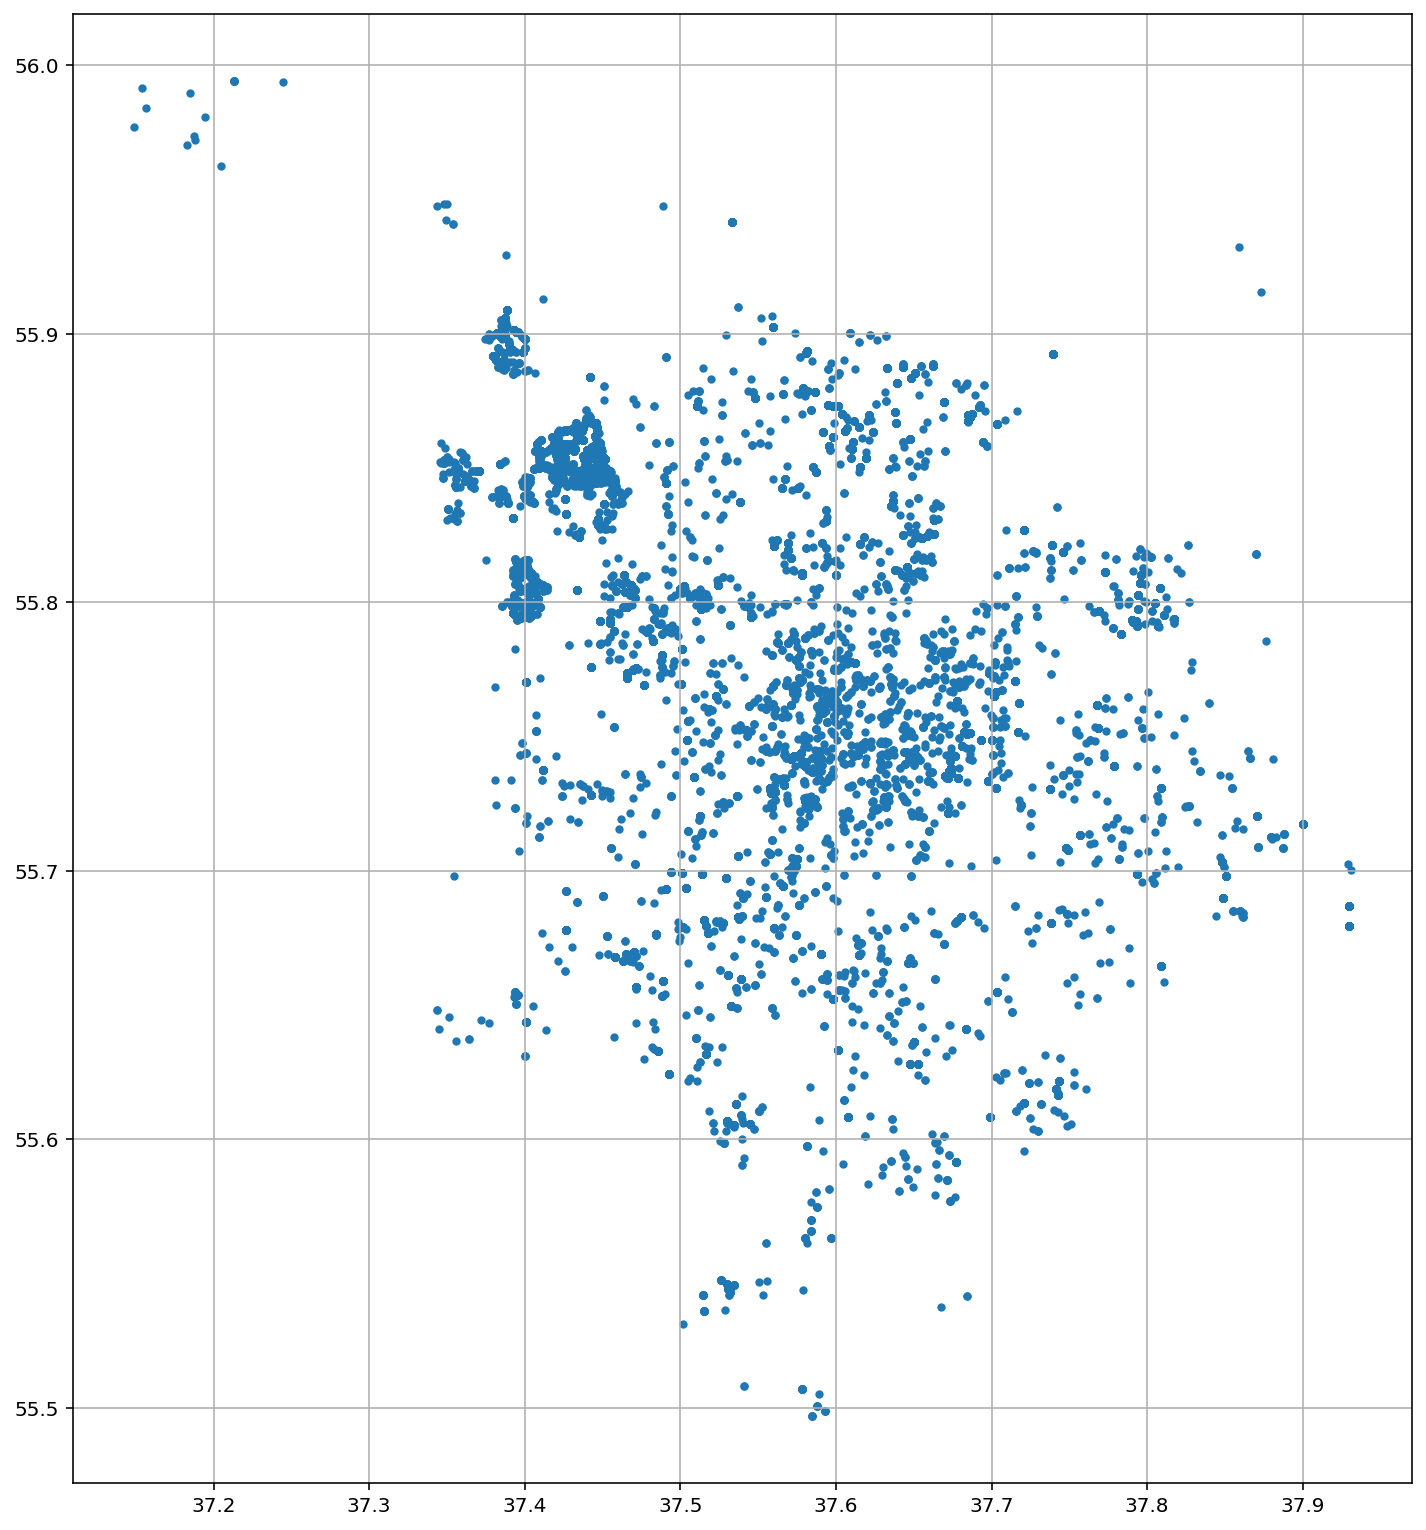

In [5]:
plt.figure(figsize=(12, 7.7 / 0.57))
plt.scatter(data.x, data.y, s=10);
plt.grid()

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [7]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

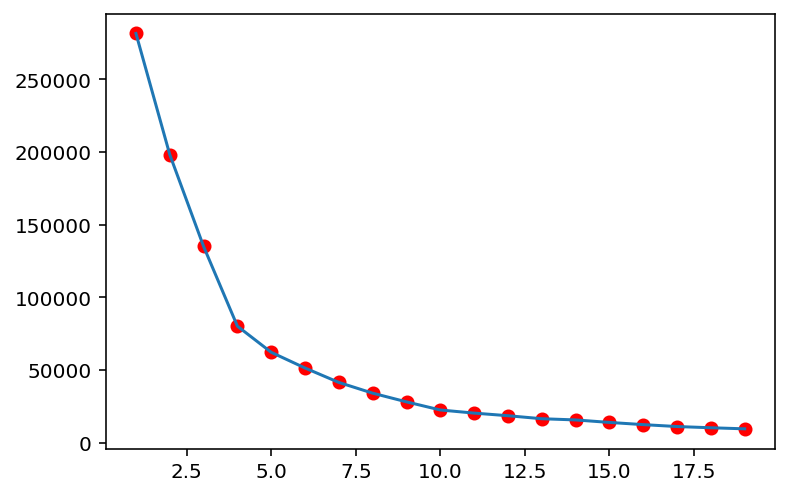

In [8]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia);

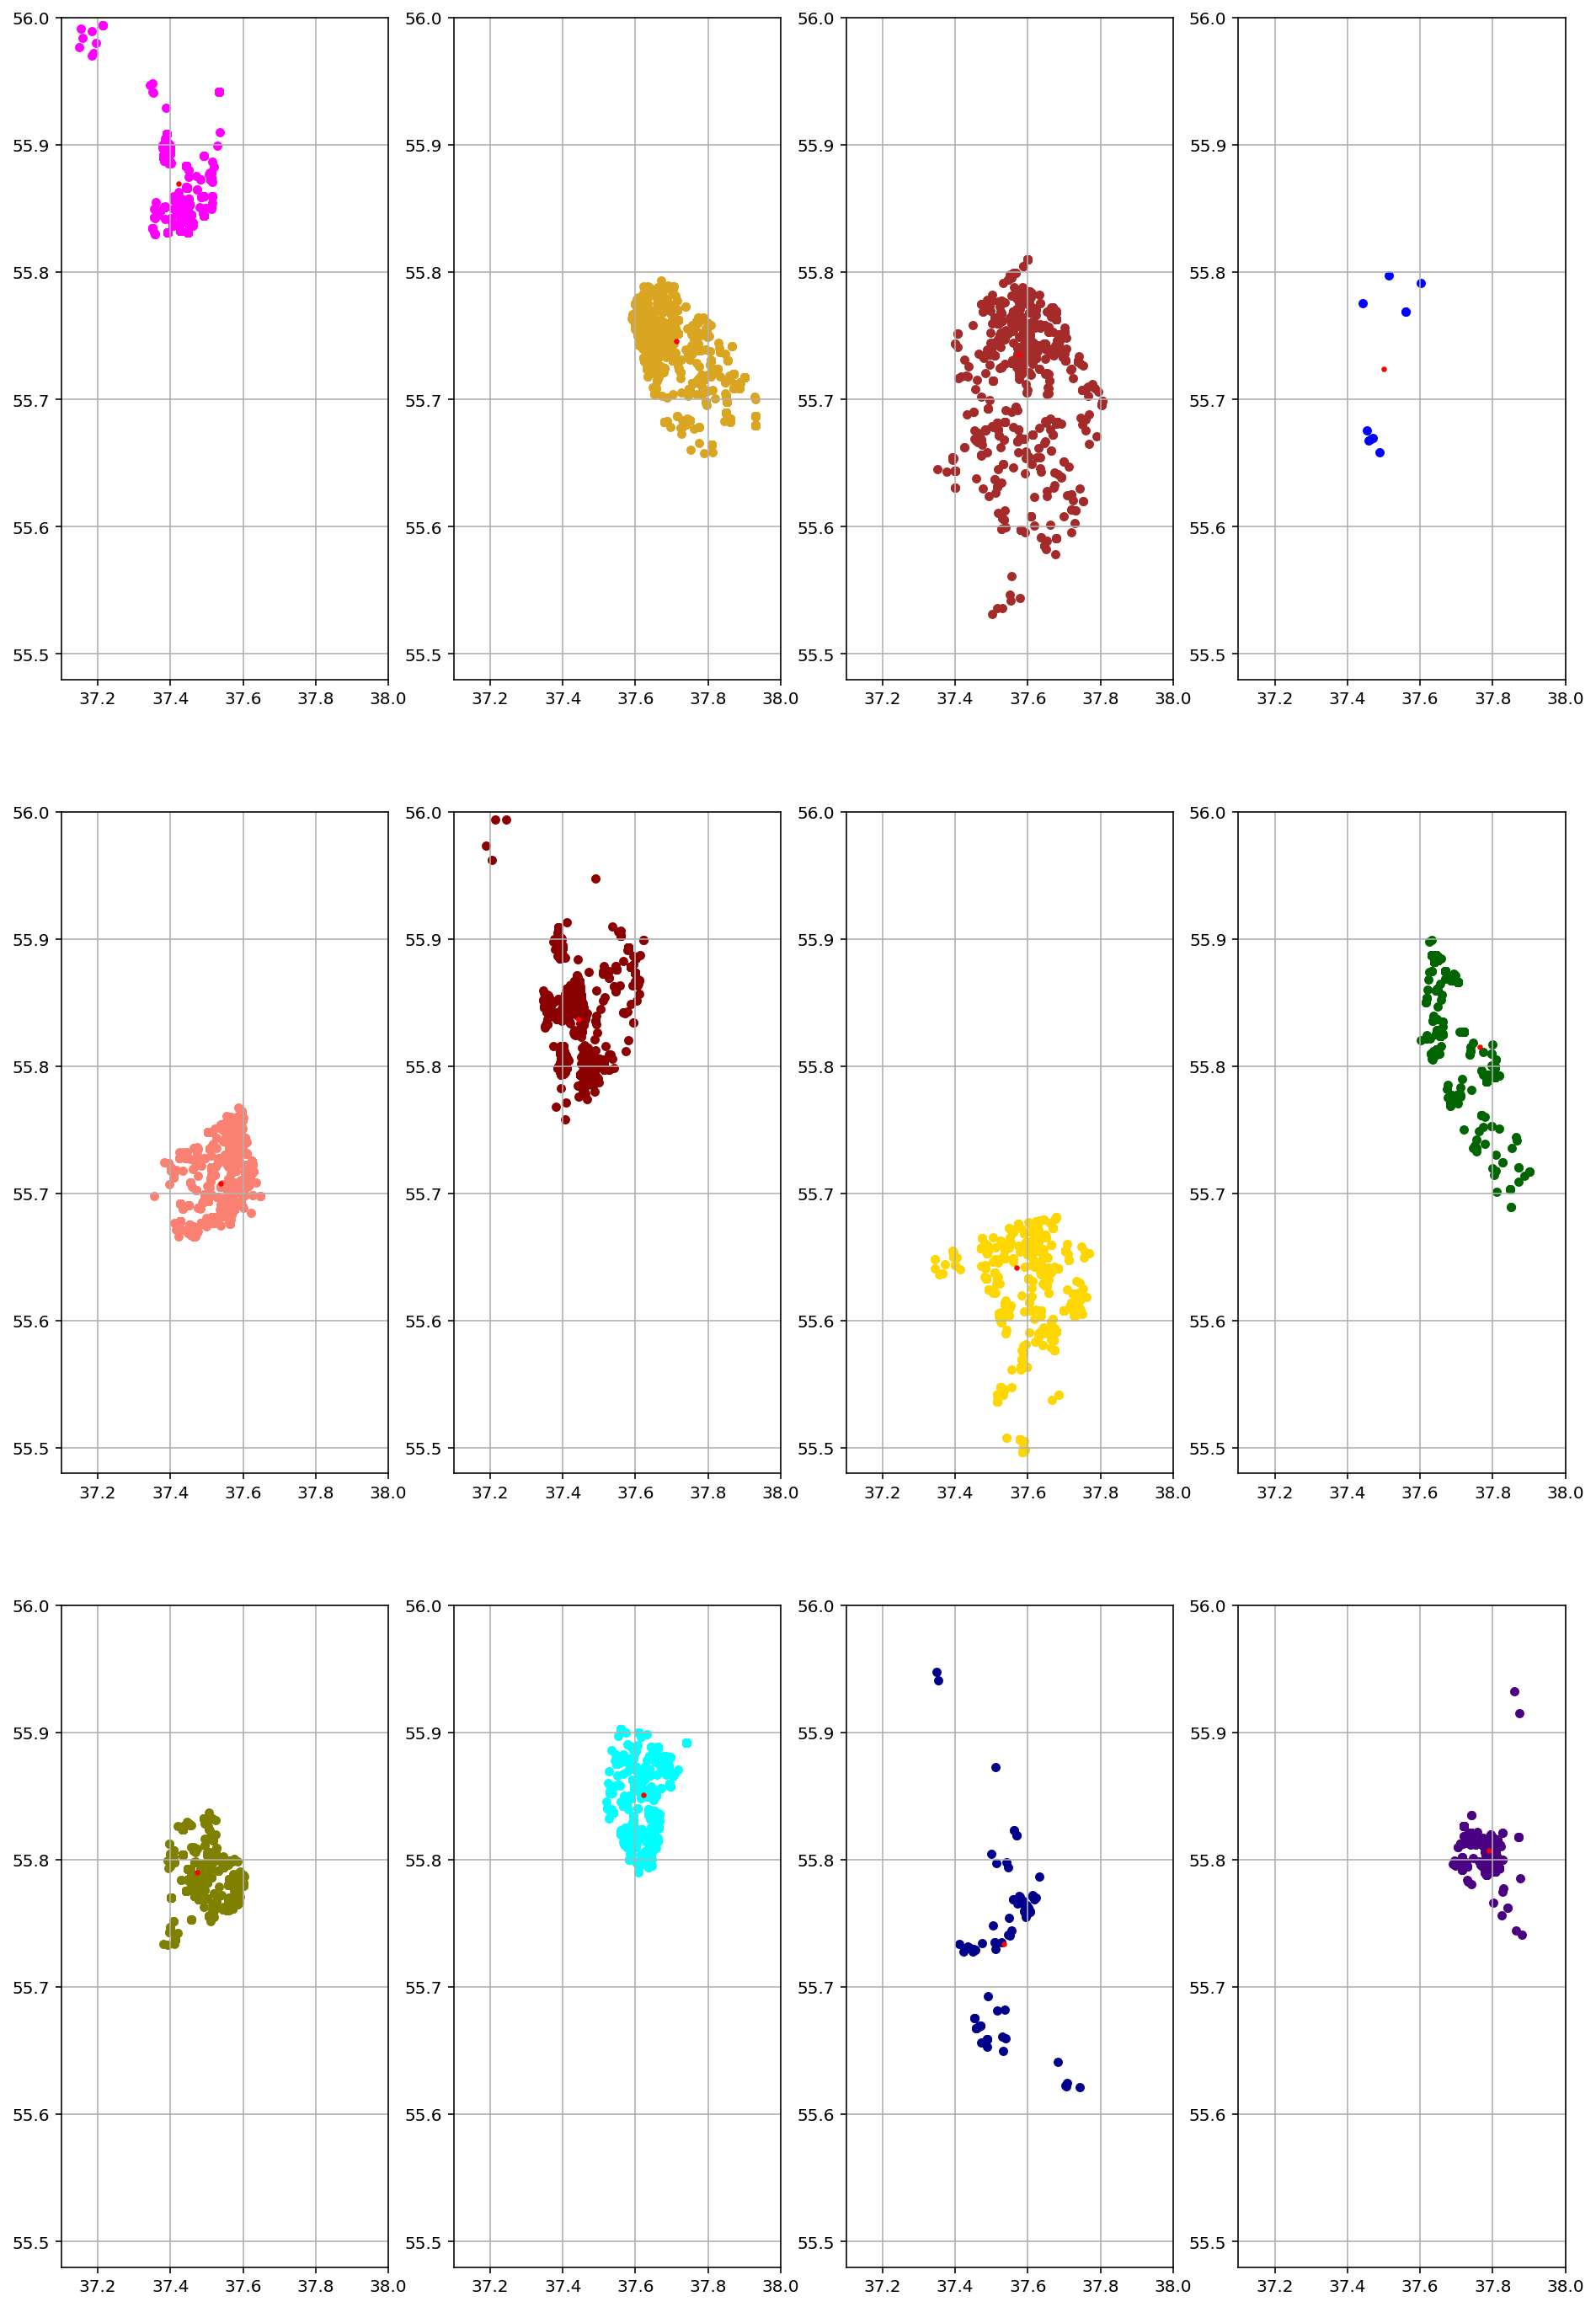

In [25]:
#https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python

n = 12

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(data_scaled)

colored = []

for c in clusters:
    colored.append(colors[c])

x_std = data.x.std()
x_mean = data.x.mean()
y_std = data.y.std()
y_mean = data.y.mean()

fig, axes = plt.subplots(3, 4, figsize=(16, 14 / 0.57))

for x in range(len(axes)):
    for y in range(len(axes[x])):
        i = x * 4 + y
        if (i < n):
            indices = np.argwhere(clusters == i).flatten()
            d = data.loc[indices]
            ax = axes[x][y]
            ax.set_autoscaley_on(False)
            ax.scatter(d.x, d.y, s=20, c=colors[i]);
            ax.grid()
            ax.set_xlim([37.1, 38])
            ax.set_ylim([55.48, 56])
            centers = kmeans.cluster_centers_
            ax.scatter(centers[i, 0] * x_std + x_mean, centers[i, 1] * y_std + y_mean, c='red', s=5)      

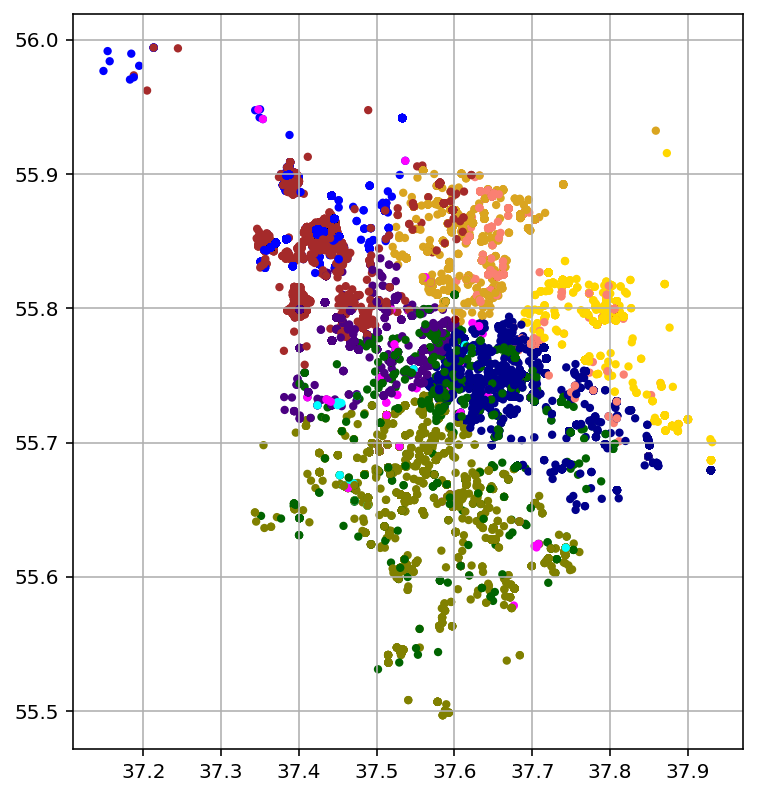

In [22]:
plt.figure(figsize=(6, 3.85 / 0.57))
plt.scatter(data.x, data.y, c=colored, s=10);
plt.grid()

In [61]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=12),
    #AgglomerativeClustering(n_clusters=12),
    DBSCAN()
]

TypeError: 'AxesSubplot' object is not iterable

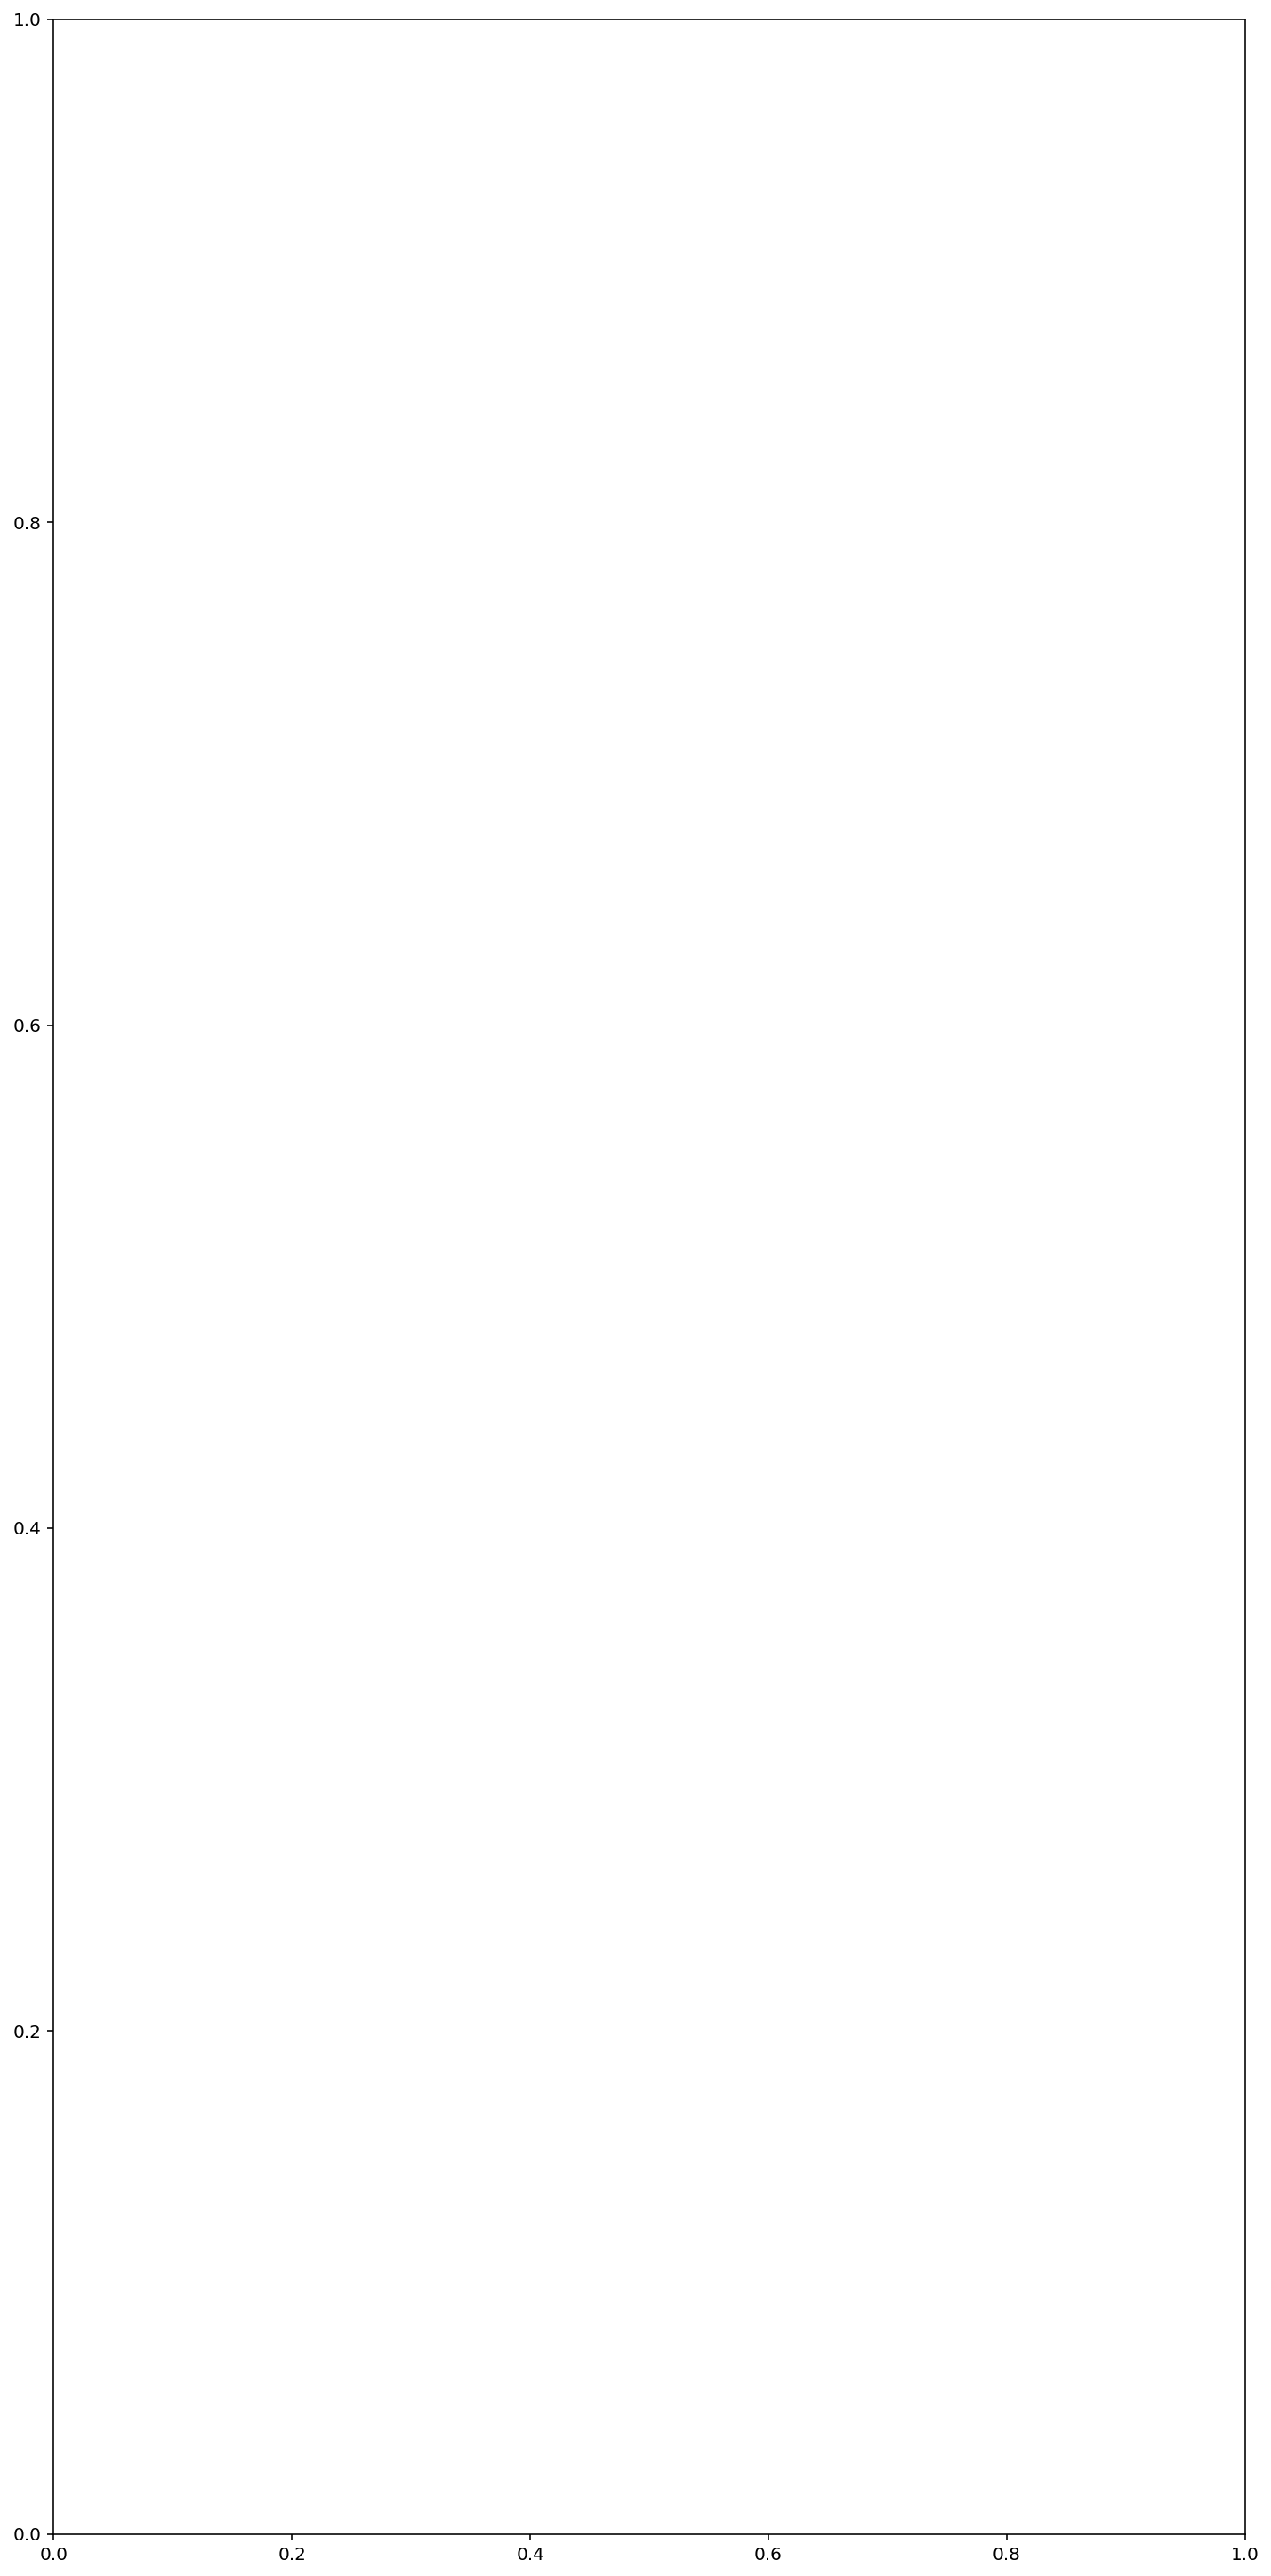

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(12, 26))

for ax, algorithm in zip(axes, algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(data_scaled)
    ax.scatter(data.x, data.y, c=clusters, cmap=colors, s=10)
    ax.set_title(algorithm.__class__.__name__)
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=5)